In [6]:
# uncomment the line below to enable realtime graphs
# %matplotlib ipympl

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from custom_interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(False)
neo.breathing(True)
neo.metabolism(True)
neo.mob(False)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)
neo.resuscitation(True)

# stabilize the model by calculating 60 seconds
neo.calculate(10)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 1.0 sec. Average model step in 0.0479 ms.


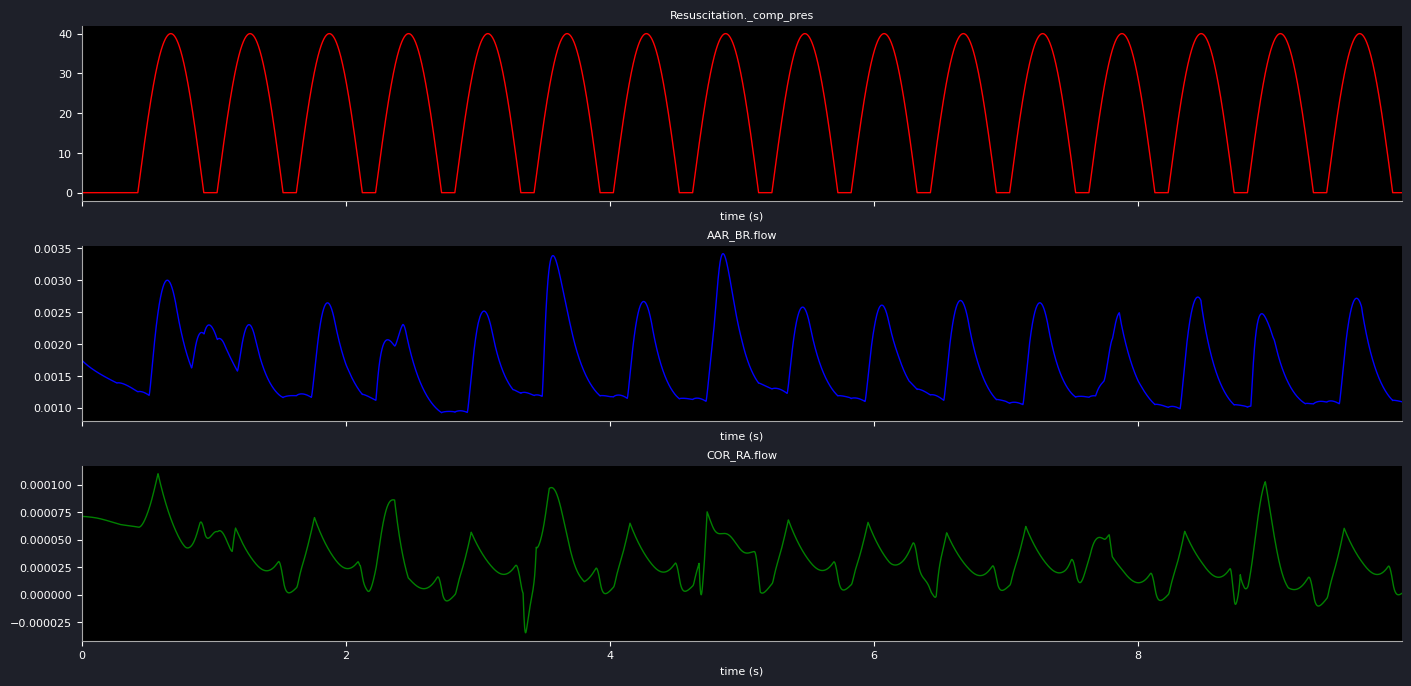

Resuscitation._comp_pres: max       40.0 min        0.0
AAR_BR.flow     : net  100.35874, forward  100.35874, backward        0.0 ml/min, stroke volume:    2.38937 ml, 
COR_RA.flow     : net    1.95891, forward    1.97699, backward   -0.01808 ml/min, stroke volume:    0.04664 ml, 


In [40]:
models["Resuscitation"].start_cpr()
models["Resuscitation"].set_heartrate(45)
models["Resuscitation"].vent_pres = 4.0
models["Resuscitation"].compressions = 3.0
models["Resuscitation"].ventilations = 1.0
models["Resuscitation"].vent_freq = 30.0
models["Resuscitation"].chest_comp_freq = 100.0
models["Resuscitation"].chest_comp_pres = 40.0
models["Resuscitation"].chest_comp_time = 0.5
models["Resuscitation"].async_ventilation = True
neo.plot_time_graph(
    ["Resuscitation._comp_pres", "AAR_BR.flow","COR_RA.flow"],
    combined=False,
    sharey=False,
    sampleinterval=0.0005,
    fill=False,
    time_to_calculate=10,
)

In [4]:
neo.get_bloodgas("AA")

{'ph': 7.540346654385078,
 'po2': 10.153969506499243,
 'pco2': 4.009759191976881,
 'hco3': 25.43012955663635,
 'be': 3.2584326246468915,
 'so2': 96.91574781216734}

In [ ]:
neo.fast_forward(120)

In [ ]:
neo.get_vitals()

In [ ]:
models["Resuscitation"].chest_comp_targets

In [ ]:
neo.get_total_blood_volume()